# Examples using Lorentzian model 

<a id='Table of Contents'></a><h3>Table of Contents</h3>
- <a href='#introduction'>Introduction</a>  
- <a href='#simple_fit_scipy'>Example: simple fit using scipy.optimize.curve_fit</a>  
- <a href='#simple_fit_lmfit'>Example: simple fit  using lmfit</a>  
- <a href='#example_2lorentzians_resolution'>Example: fit using two lorentzians convoluted with the instrument resolution and lmfit as the fitting engine</a> 

(<a href='#Table of Contents'>Top</a>)<a id='introduction'></a><h2>Introduction</h2>
<div class="alert alert-block alert-info">
The objective of this notebook is to show how to use one of the models of 
the [QENSlibrary](https://github.com/QENSlibrary/QENSmodels),  `Lorentzian`, to perform some 
fits.
</div>

Two different modules will be used for fitting:
- [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
- [`lmfit`](https://lmfit.github.io/lmfit-py/)

In [1]:
# import python modules for plotting, fitting
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# for interactive plot
import ipywidgets

# import model from QENS library
import QENSmodels

path_to_data = './data/'

The widget below shows the lorentzian peak shape function imported from QENSmodels where the function's parameters *Scale*, *Center* and *FWHM* can be varied:

In [2]:
xx = np.linspace(-10,10,100)

def interactive_plot(scale, center, fwhm):
    plt.plot(xx, QENSmodels.lorentzian(xx, float(scale), float(center), float(fwhm)))
    plt.ylabel('lorentzian(x,{scale},{center},{fwhm})'.
               format(scale=scale, center=center, fwhm=fwhm))
    plt.xlabel('x')
    plt.grid()
    plt.show()

interactive_plot = ipywidgets.interactive(interactive_plot, 
                                          scale=(1, 10), 
                                          center=(0, 10), 
                                          fwhm=(1, 5))

def reset_values(b):
    """Reset the interactive plots to inital values."""
    interactive_plot.children[0].value = 5
    interactive_plot.children[1].value = 5
    interactive_plot.children[2].value = 3

reset_button = ipywidgets.Button(description = "Reset")
reset_button.on_click(reset_values)

output = interactive_plot.children[-1]
output.layout.height = '270px'
display(interactive_plot, reset_button)

interactive(children=(IntSlider(value=5, description=u'scale', max=10, min=1), IntSlider(value=5, description=u'center', max=10), IntSlider(value=3, description=u'fwhm', max=5, min=1), Output(layout=Layout(height=u'270px'))), _dom_classes=('widget-interact',))

Button(description=u'Reset', style=ButtonStyle())

(<a href='#Table of Contents'>Top</a>)<a id='simple_fit_scipy'></a><h2>Example: simple fit using scipy.optimize.curve_fit</h2>

**Input:** the reference data for this simple example correspond to a Lorentzian with added noise.

The fit is performed using `scipy.optimize.curve_fit`. <br> Examples are based on implementations from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Note that fitting could be done using [`lmfit`](https://lmfit.github.io/lmfit-py/) or [`bumps`](http://bumps.readthedocs.io/en/latest/) instead of `scipy.optimize.curve_fit` (see <a href='#simple_fit_lmfit'>Example using lmfit</a>). 

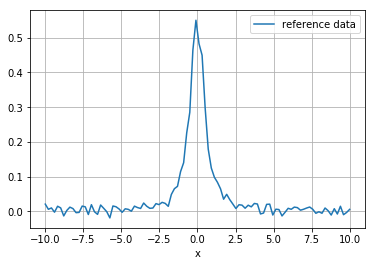

In [3]:
# Creation of reference data
lorentzian_noisy = QENSmodels.lorentzian(xx, 0.89, -0.025, 0.45)*(1+0.1*np.random.normal(0,1,100)) + 0.01*np.random.normal(0,1,100)
 
plt.plot(xx, lorentzian_noisy, label='reference data')

plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

In [4]:
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# perform fit with initial guesses scale=1, center=0 FWHM=0.5

popt, pcov = curve_fit(QENSmodels.lorentzian, xx, lorentzian_noisy, p0=[1, 0, 0.5])

# Calculation of the errors on the refined parameters:

perr = np.sqrt(np.diag(pcov))

print 'Values of refined parameters:'
print 'scale:', popt[0],'+/-', perr[0]
print 'center :', popt[1],'+/-', perr[1]
print 'FWHM', popt[2],'+/-', perr[2]

Values of refined parameters:
scale: 1.0 +/- inf
center : 0.0 +/- inf
FWHM 0.5 +/- inf


/Users/celinedurniak/.local/lib/python2.7/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


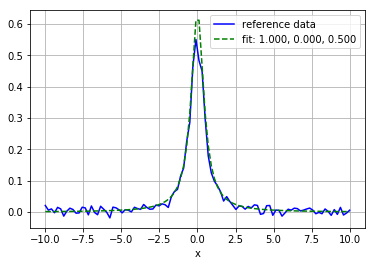

In [5]:
# Comparison of reference data with fitting result
plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, QENSmodels.lorentzian(xx, *popt), 'g--', label='fit: %5.3f, %5.3f, %5.3f' % tuple(popt))
plt.legend()
plt.xlabel('x')
plt.grid()
plt.show()

(<a href='#Table of Contents'>Top</a>)<a id='simple_fit_lmfit'></a><h2>Example: simple fit  using lmfit</h2>

The following example uses the same data as in the main part of the document but the fitting is performed with [`lmfit`](https://lmfit.github.io/lmfit-py/) instead of `scipy.optimize.curve_fit`.

Names of parameters: ['scale', 'center', 'hwhm']
Independent variable(s): ['x']
Result of fit:
[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 100
    # variables        = 3
    chi-square         = 0.64781083
    reduced chi-square = 0.00667846
    Akaike info crit   = -497.932675
    Bayesian info crit = -490.117164
[[Variables]]
    scale:   1.00000000 +/- 0.00000000 (0.00%) (init = 1)
    center:  4.4583e-08 +/- 0.00000000 (0.00%) (init = 0)
    hwhm:    1.00000000 +/- 0.00000000 (0.00%) (init = 1)



/Users/celinedurniak/anaconda/envs/aseenv/lib/python2.7/site-packages/lmfit/model.py:821: UserWarning: The keyword argument fwhm does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)


(<matplotlib.figure.Figure at 0x1192ca050>,
 <matplotlib.gridspec.GridSpec at 0x1192e6e10>)

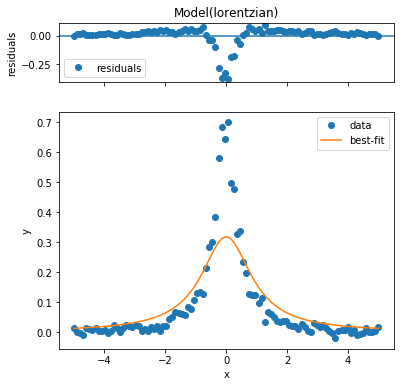

In [6]:
from lmfit import Model
import matplotlib.pyplot as plt
%matplotlib inline

gmodel = Model(QENSmodels.lorentzian)
print 'Names of parameters:', gmodel.param_names 
print 'Independent variable(s):', gmodel.independent_vars 

# Create array of reference data
xx = np.linspace(-5,5,100)
lorentzian_noisy = QENSmodels.lorentzian(xx, 0.89, -0.025, 0.45)*(1+0.1*np.random.normal(0,1,100)) + 0.01*np.random.normal(0,1,100)

# Fit
result = gmodel.fit(lorentzian_noisy, x=xx, scale=1, center=0, fwhm=0.5)

# display result
print'Result of fit:\n',result.fit_report()

# plot
result.plot()

(<a href='#Table of Contents'>Top</a>)<a id='example_2lorentzians_resolution'></a><h2>Example: fit using two lorentzians convoluted with the instrument resolution and lmfit as the fitting engine</h2>

The following example uses the data from IRIS:
- workspace_index=0, file: `irs26176_graphite002_red.nxs` 
- related instrument resolution data `irs26173_graphite002_res.nxs` 

The ISIS sample datasets can be downloaded from [Mantid's website](http://download.mantidproject.org/).
The data used for this example are in the sample datafile: `data_2lorentzians.dat` and the instrument resolution datafile `irf_iris.dat`, respectively.

This example is based on a [Mantid "Fitting QENS Peaks" tutorial](https://www.mantidproject.org/Fitting_QENS_Peaks).

The implementation with `lmfit` is based on https://lmfit.github.io/lmfit-py/model.html

This example requires an additional Python module `scipy.interpolate` to interpolate the tabulated data of the instrument resolution

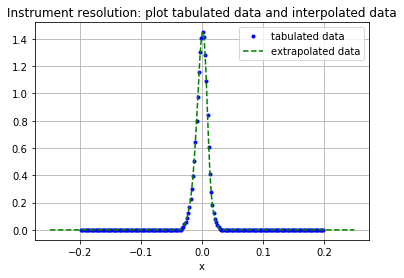

Names of parameters: ['scale1', 'center1', 'fwhm1', 'scale2', 'center2', 'fwhm2']
Independent variable(s): ['x']
Result of fit:
[[Model]]
    (Model(irf_gate) <function convolve at 0x116e5b488> Model(model_2lorentzians))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 1905
    # variables        = 6
    chi-square         = 1643042.64
    reduced chi-square = 865.214659
    Akaike info crit   = 12889.4629
    Bayesian info crit = 12922.7764
[[Variables]]
    scale1:   1.00000000 +/- 0.00000000 (0.00%) (init = 1)
    center1:  0.12571038 +/- 0.00000000 (0.00%) (init = 0)
    fwhm1:    0.50000000 +/- 0.00000000 (0.00%) (init = 0.5)
    scale2:   1.00000000 +/- 0.00000000 (0.00%) (init = 1)
    center2:  1.00000000 +/- 0.00000000 (0.00%) (init = 1)
    fwhm2:    0.50000001 +/- 0.00000000 (0.00%) (init = 0.5)



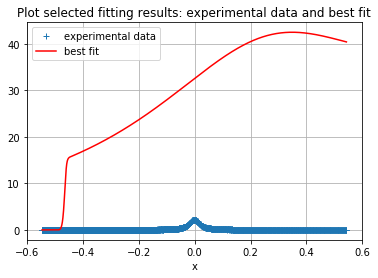

In [7]:
from lmfit import Model, CompositeModel
from scipy.interpolate import interp1d

# Create model - 2 lorentzians convoluted with instrument resolution - 6 parameters
# Step 1 load instrument resolution data
irf_iris = np.loadtxt(path_to_data + 'irf_iris.dat')
x_irf = irf_iris[:, 0]
y_irf = irf_iris[:, 1]

# Step 2: create function for instrument resolution data (cubic interpolation between tabulated data points)
f = interp1d(x_irf, y_irf, kind='cubic', bounds_error=False, fill_value='extrapolate')

def irf_gate(x):
    """ Function defined from the interpolation of instrument resolution data 
    Used to define fitting model and plot """ 
    return f(x)

# plot tabulated data and interpolated data
xx = np.linspace(-.25, .25, 500)
plt.plot(x_irf, y_irf, 'b.', label='tabulated data')
plt.plot(xx, irf_gate(xx), 'g--', label='extrapolated data')

plt.legend()
plt.xlabel('x')
plt.title('Instrument resolution: plot tabulated data and interpolated data')
plt.grid()
plt.show()

# Step 3: create "double lorentzian" profile
def model_2lorentzians(x, scale1, center1, fwhm1, scale2, center2, fwhm2):
    return QENSmodels.lorentzian(x, scale1, center1, fwhm1) + QENSmodels.lorentzian(x, scale2, center2, fwhm2)

# Step 4: create convolution function 
# (code from https://lmfit.github.io/lmfit-py/model.html)
def convolve(arr, kernel):
    # simple convolution of two arrays
    npts = min(len(arr), len(kernel))
    pad  = np.ones(npts)
    tmp  = np.concatenate((pad*arr[0], arr, pad*arr[-1]))
    
    out  = np.convolve(tmp, kernel, mode='valid')
    noff = int((len(out) - npts)/2)
    return out[noff:noff+npts]

# Create model for the fit
gmodel = CompositeModel(Model(irf_gate), Model(model_2lorentzians), convolve) 

print 'Names of parameters:', gmodel.param_names 
print 'Independent variable(s):', gmodel.independent_vars 

# Load reference data - extract x and y values
two_lorentzians_iris = np.loadtxt(path_to_data + 'data_2lorentzians.dat')
xx = two_lorentzians_iris[:, 0]
yy = two_lorentzians_iris[:, 1]

# Fit
result = gmodel.fit(yy, x=xx, scale1=1, center1=0, fwhm1=0.5, scale2=1, center2=1, fwhm2=0.5)

# display result
print'Result of fit:\n', result.fit_report()

# plot selected results: experimental data and best fit
plt.plot(xx, yy, '+', label='experimental data')

plt.plot(xx, result.best_fit, 'r-', label='best fit')
plt.grid()
plt.xlabel('x')
plt.title('Plot selected fitting results: experimental data and best fit')
plt.legend()
plt.show()


(<matplotlib.figure.Figure at 0x1193f0b50>,
 <matplotlib.gridspec.GridSpec at 0x1193e61d0>)

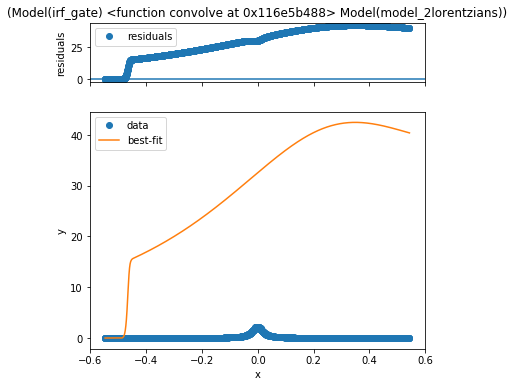

In [8]:
# other option to plot result using lmfit's features
result.plot()

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open("/Users/celinedurniak/Downloads/CFDPython-master/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()